In [137]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [138]:
def simon_oracle(b):
    n = len(b)
    circ = QuantumCircuit(2*n, n)

    for i in range(n):
        circ.cx(i, i+n)

    #reversd_b = b[::-1]

    for i in range(n):
        if b[n-1-i] == '1':
            circ.cx(i, range(i+n, 2*n))
            break

    return circ

In [139]:
b = '1001'
n = len(b)

circ = QuantumCircuit(2*n, n)
circ.h(range(n))
circ.barrier()

circ = circ.compose(simon_oracle(b))

circ.barrier()

circ.h(range(n))

circ.measure(range(n), range(n))

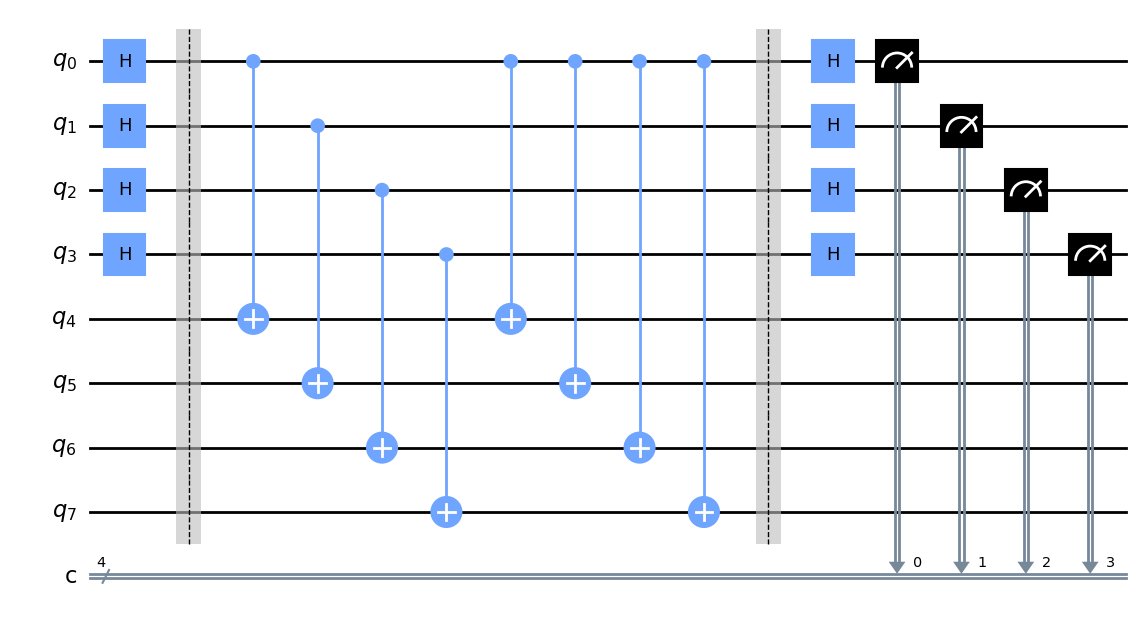

In [140]:
circ.draw('mpl')

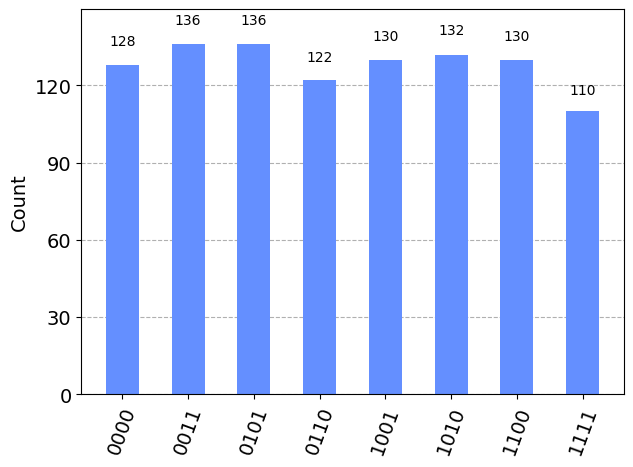

In [141]:
sim = Aer.get_backend("qasm_simulator")
result = execute(circ, backend=sim).result()

plot_histogram(result.get_counts())

In [142]:
#find b

def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    print(accum)
    return (accum % 2)

In [143]:
shots = 1024
for z in result.get_counts().keys():
    print( '{} . {} = {} (mod 2) ({:.1f}%)'.format(b, z, bdotz(b,z), result.get_counts()[z]*100/shots))

0
1001.0110 = 0 (mod 2) (11.9%)
2
1001.1111 = 0 (mod 2) (10.7%)
2
1001.1001 = 0 (mod 2) (12.7%)
1
1001.1010 = 1 (mod 2) (12.9%)
0
1001.0000 = 0 (mod 2) (12.5%)
1
1001.0011 = 1 (mod 2) (13.3%)
1
1001.1100 = 1 (mod 2) (12.7%)
1
1001.0101 = 1 (mod 2) (13.3%)
